# Проектная работа на тему: "Как рассказать историю с помощью данных"

## Описание проекта

Для анализа перспективности открытия кафе, с обслуживающим персоналом-роботами, требуется подготовить исследование рынка кафе в Москве. В наличии есть открытые данные о заведениях общественного питания в Москве.

## Описание данных
Таблица rest_data:  

id — идентификатор объекта;  
object_name — название объекта общественного питания;  
chain — сетевой ресторан;  
object_type — тип объекта общественного питания;  
address — адрес;  
number — количество посадочных мест.  

## Шаг №1. Загрузка данных и подготовка их к анализу

Загрузим необходимые библиотеки и данные.

In [1]:
import pandas as pd
import seaborn as sns
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В датафрейме rest_data 6 столбцов и 15366 строк, без пропущенных значений.

Проверим столбец id

In [5]:
rest_data['id'].nunique()

15366

Количество уникальных записей соответствует количеству не нулевых записей из rest_data.info(). Значит каждый объект имеет свой уникальный номер.  
Проверим столбец object_name на неявные дубликаты.

In [6]:
rest_data['object_name'].nunique()

10393

10393 уникальных названий заведений.

In [7]:
rest_data['object_name'].value_counts().head(30)

Столовая                    267
Кафе                        236
Шаурма                      234
KFC                         155
Шоколадница                 142
Бургер Кинг                 122
Макдоналдс                  122
Домино'с Пицца               86
Теремок                      84
Крошка Картошка              82
Пекарня                      76
Милти                        65
Суши Wok                     61
Буфет                        59
СТОЛОВАЯ                     52
Папа Джонс                   50
Кофе с собой                 44
Школьно-базовая столовая     44
Чайхона №1                   42
КАФЕ                         41
Выпечка                      36
Хинкальная                   35
Кафетерий                    35
Якитория                     33
Додо Пицца                   31
Кофе Хаус                    31
Starbucks                    30
МАКДОНАЛДС                   29
Кофейня                      29
Subway                       29
Name: object_name, dtype: int64

Встречаются одинаковые названия объектов, но в разном регистре. Приведем все названия к нижнему регистру.

In [8]:
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [9]:
rest_data['object_name'].nunique()

9924

Количество уникальных названий заведений снизилось до 9924 шт.

Также проверим, на примере Шоколадницы, различные варианты записи названия этого заведения.

In [10]:
list = []
for item in rest_data['object_name']:
    if 'шоколадн' in item:
        list.append(item)
print(list)

['шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница кофе хаус', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'кофейня «шоколадница»', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'кафе «шоколадница»', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадное ателье', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'шоколадница', 'кафе «шоколадница»', 'шоколадница', 'шоколадница', 'кафе «шоколад

Есть варианты: кафе «шоколадница», кофейня «шоколадница», шоколадница экспресс. Чтобы избавиться от данных дубликатов, наиболее популярных заведений, составим словарь синонимов стандартных названий.

In [11]:
synonyms = {
    'kfc': ['fridays kfc', 'kfc волгоградский', 'kfc.', 'закусочная kfc', 'закусочная «kfc»',
            'кафе kfc', 'кафе «kfc»', 'кфс амрест', 'пбо «kfc покрышкина»', 'пбо «kfc»',
            'предприятие быстрого обслуживания «kfc»', 'ресторан kfc', 'ресторан «kfc»',
            'ресторан быстрого питания kfc', 'ресторан кфс', 'ростикс kfc'],
    'burger king': ['burgerking', 'бурген кинг', 'бургер кинг', 'бургер кинг burger king',
                    'закусочная «бургер кинг»', 'кафе «бургер кинг»', 'кафе бургер кинг',
                    'кафе-закусочная «бургер кинг»',
                    'предприятие быстрого обслуживания «бургер кинг»', 'ресторан «бургер кинг»'],
    'mcdonalds': ['кафе «макдоналдс»', 'кафе макдоналдс', 'макдоналдс', 'москва - макдоналдс',
                  'предприятие быстрого обслуживания «макдоналдс»', 'ресторан «макдоналдс»', 'ресторан«макдоналдс»'],
    'bb&burgers': ['bb & burgers', 'bb энд burger', 'бб энд бургерс в&в бургер'],
    'burger club': ['бургер клаб'],
    'coffeeshop company': ['кофешоп coffeeshop company'],
    'cofix': ['кофикс'],
    'costa coffee': ['кафе «costa coffee»', 'кафе коста', 'коста кофе', 'кофейня «costa coffee»', 'кофейня кофе коста'],
    'dunkin donuts': ['dunkin donuts (азия box - бургер box)', 'данкин донатс', 'кафе dunkin donuts',
                      'кафе «данкин донатс»'],
    'florentini': ['ресторан «florentini»', 'флорентини'],
    'fridays': ['фрайдис'],
    'glowsubs sandwiches': ['glow sabs', 'глоу сабс'],
    'goodman': ['goodman гудман', 'гудман', 'гудман гудвин', 'ресторан «goodman»', 'ресторан гудман',
                'стейк хаус гудман', 'стейк-хаус гудман'],
    'grand урюк': ['гранд урюк'],
    'healthy food': ['кафе «healthy food»'],
    'il forno': ['il forno иль форно', 'альфорно', 'иль форно'],
    'jeffreys coffee': ['джеффрис кофе'],
    'krispy kreme': ['krispy creme', 'krispy krem'],
    'lavkalavka': ['кафе «лавкалавка»', 'лавкалавка'],
    'maki maki': ['маки-маки', 'ресторан маки-маки', 'ресторан японской кухни «маки-маки»',
                  'суши «маки-маки»', 'суши бар «маки-маки»'],
    'moskalyan': ['анти-кафе кальянная «moskalyan»', 'кальян-бар moskalyan',
                  'кальянная «москальян»', 'кафе «кальянная москальян»', 'москальян'],
    'movenpick': ['coffee & waffles & movenpick', 'коктейли movenpick', 'мороженное movenpick'],
    'osteria mario': ['bq cafe & osteria mario', 'osteria mario+швили', 'osteriamario', 'остериа марио',
                      'остерия марио', 'ресторан «osteria mario»'],
    'paul': ['paul cafe', 'paul поль',
             'кафе «поль бейкери»', 'кафе-пекарня paul',
             'поль бейкери', 'ресторан paul'],
    'prime star': ['prime star прайм стар', 'prime прайм стар',
                   'prime прайм стар прайм-кафе', 'кафе prime прайм стар', 'кафе prime прайм стар прайм-кафе',
                   'кафе «prime star»', 'кафе «prime» (прайм стар)', 'кафе «prime» прайм стар', 'кафе «прайм стар»',
                   'кафе прайм стар',
                   'прайм стар', 'прайм стар кафе', 'прайм-кафе прайм стар', 'праймкафе прайм стар'],
    'starbucks': ['starbucks coffee', 'starbucks кофе', 'starbucks старбакс', 'starbucks',
                  'старбакс кофе', 'кафе starbucks',
                  'кафе «starbucks»', 'кафе «кофейня старбакс»',
                  'кафе «сабвей» старбакс', 'кафе «старбакс»', 'кофейня «старбакс кофе»', 'кофейня «старбакс»',
                  'кофемания starbucks', 'старбакс', 'старбакс starbucks', 'старбакс кофе'],
    'subway': ['кафе «subway»', 'кафе «сабвэй»', 'кафе сабвей', 'сабвей', 'сабвей subway', 'сабвей сушивок', 'сабвэй'],
    'tgi fridays': ['ресторан tgi friday s', 'ресторан «tgi fridays»'],
    'torro grill': ['torro gril & wine bar',
                    'torro grill & wine bar', 'torro grill торро гриль',
                    'ресторан торро гриль', 'торро гриль'],
    'travelers coffee': ['travelers coffe', "кафе «traveler's coffee»", 'кафе «travelers coffee»',
                         'кофейня тревеллерс'],
    'tutti frutti': ['tutti frutti frozen yogurt', 'кафе мороженного «tutti frutti»', 'тутти фрутти'],
    'upside down cake': ['upside down', 'upside down cake (udcкафе)', 'upside down cake кафе'],
    'vanwok': ['van wok', 'van wok ванвок', 'vanwok ванвок', 'ванвок'],
    'wokker': ['вокер', 'воккер', 'кафе воккер', 'каффе «wokker»'],
    'кулинарная лавка братьев караваевых': ['«кафе «кулинарная лавка братьев караваевых»',
                                            '«кафе «кулинарная лавка братьев караваевых»»',
                                            'братья караваевы', 'братья караваевых',
                                            'кафе «кулинарная лавка братьев караваевых»',
                                            'кулинарная лавка братьев караваевых братья караваевы'],
    'алло пицца': ['алло-пицца', 'пиццерия «алло пицца»'],
    'баскин роббинс': ['закусочная «баскин роббинс & стардогс»', 'кафе «баскин роббинс»'],
    'додо пицца': ['додопицца', 'пицца «додо»', 'пиццерия «додо пицца»', 'пиццерия «додо»',
                   'предприятие быстрого обслуживания «додо пицца»'],
    "domino's pizza": ['domino-s pizza', 'dominos pizza', "домино'с пицца", "домино'с пицца domino,s pizza",
                       'доминос пицца',
                       "кафе «домино'с пицца»", "пиццерия «домино'с пицца»",
                       "предприятие быстрого обслуживания «домино'с пицца»", "ресторан «домино'с пицца»",
                       'ресторан доминос'],
    'крошка картошка': ['закусочная «крошка картошка»', 'кафе «крошка картошка»', 'кафе «крошка-картошка»',
                        'крошка крем', 'крошка-картошка', 'крошкакартошка',
                        'предприятие быстрого обслуживания «крошка картошка»',
                        'предприятие быстрого питания «крошка картошка»',
                        'ресторан быстрого питания «крошка картошка»'],
    'шоколадница': ['кафе «шоколадница»', 'кофейня «шоколадница»', 'кофейня шоколадница', 'шоколадница кофе хаус',
                    'шоколадница кофемания', 'шоколадница экспресс'],
    'теремок': ['закусочная «теремок»', 'кафе «теремок»', 'кафе теремок', 'пбо «теремок»',
                'предприятие быстрого обслуживания «теремок»', 'ресторан «теремок»',
                'ресторан теремок'],
    'суши wok': ['бар «суши wok»', 'кафе «суши wok»', 'кафе суши wok', 'сеть магазинов «суши wok»'],
    'милти': ['готовые блюда милти', 'магазин готовой еды «милти»', 'милти готовые блюда для здорового питания',
              'предприятие быстрого обслуживания «милти»', 'точка продажи готовой еды милти'],
    'папа джонс': ['кафе «папа джонс»', 'папа джойс', 'папа джонс пицца', 'пицерия «папа джонс»',
                   'пицерия папа джонс', 'пиццерия «папа джонс»', 'пиццерия папа джонс'],
    'чайхона №1': ['вlack burger чайхона №1', 'кафе чайхона №1',
                   'павлин мавлин чайхона №1', 'ресторан «чайхона №1»', 'чайхона №1 бутово'],
    'якитория': ['кафе «якитория»', 'кафе якитория', 'ресторан «якитория»', 'якитория и спорт бар',
                 'якитория и ян примус'],
    'кофе хаус': ['кафе «кофе хаус»', 'кофе хаус,экспресс', 'кофе хаус. экспрессо и капучино бар',
                  'кофейня «кофе хаус»'],
    'хлеб насущный': ['кафе «хлеб насущный»', 'кафе хлеб насущный'],
    'тануки': ['кафе «тануки»', 'ресторан «тануки»', 'ресторан тануки'],
    'мята lounge': ['бар мята lounge', 'кальян- бар «мята lounge»', 'кальян-бар «мята lounge»',
                    'кальян-бар мята lounge', 'кальянная «мята lounge»', 'кальянная мята lounge',
                    'кафе «мята lounge» кальянный клуб', 'лаундж-бар «мята lounge»', 'мята lounge автозаводская',
                    'мята lounge октябрьская', 'мята lounge шаболовка'],
    'му-му': ['кафе «му-му»', 'кафе быстрого питания му-му', 'кафе му-му'],
    'pizza hut': [ 'закусочная «пицца хат»', 'кафе «пицца хат»', 'пицца хат',
                  'пиццерия «пицца хат»', 'ресторан «пицца хат»']
}

И составим функцию по замене синонимов названий заведений на стандартное название.

In [12]:
def check_synonyms(cell):
    for name, syn in synonyms.items():
        if cell in syn: return name
    return cell

После этого запишем стандартное название в новую колонку object_name_new.

In [13]:
rest_data['object_name_new'] =  rest_data['object_name'].apply(check_synonyms)

In [14]:
rest_data['object_name_new'].nunique()

9673

После всех преобразований количество уникальных названий заведений снизилось с 10393 до 9673 шт.

Проверим столбец chain

In [15]:
rest_data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

В столбце 2 значений 'да' и 'нет'. Сетевых заведений намного больше.

Проверим столбец object_type.

In [16]:
rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Преобладают кафе.

Проверим столбец address.

In [17]:
rest_data['address'].value_counts()

город Москва, Ходынский бульвар, дом 4                         95
город Москва, Пресненская набережная, дом 2                    63
город Москва, проспект Мира, дом 211, корпус 2                 60
город Москва, Кировоградская улица, дом 13А                    53
город Москва, площадь Киевского Вокзала, дом 2                 48
                                                               ..
город Москва, улица Большая Якиманка, дом 33/13, строение 1     1
город Москва, улица Красная Пресня, дом 31                      1
город Москва, бульвар Яна Райниса, дом 49                       1
город Москва, Широкая улица, дом 9А                             1
город Москва, проспект 60-летия Октября, дом 27                 1
Name: address, Length: 9108, dtype: int64

По адресам в верху списка, находятся крупные торгово-развлекательные комплексы, с большим количеством заведений общественного питания.

Проверим столбец number.

In [18]:
rest_data['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Минимальное количество посадочных мест - 0, максимальное - 1700. Проверим заведения с таким количеством мест.

In [19]:
rest_data.query('number == 0')['object_name'].value_counts().head(10)

шаурма             205
милти               57
пекарня             42
кофе с собой        35
донер кебаб         28
выпечка             24
донер               17
крошка картошка     16
шаурма, выпечка     13
буфет               13
Name: object_name, dtype: int64

Нулевое количество посадочных мест у заведений бысторго питания.

In [20]:
rest_data.query('number >= 1000')[['object_name_new', 'address', 'number']].value_counts()

object_name_new                             address                                                          number
arena by soho family                        город Москва, Кутузовский проспект, дом 36, строение 11          1700      1
банкетный зал шелк                          город Москва, Большой Саввинский переулок, дом 12, строение 10Г  1500      1
комбинат питания «управление академсервис»  город Москва, проспект Вернадского, дом 84, строение 1           1288      1
ресторан «альфа»                            город Москва, Измайловское шоссе, дом 71, корпус А               1040      1
рум сервис                                  город Москва, Кутузовский проспект, дом 2/1, строение 1          1200      1
                                            город Москва, площадь Европы, дом 2                              1200      1
столовая-буфет                              город Москва, улица Волхонка, дом 15                             1400      1
dtype: int64

Заведения с таким большим количеством посадочных мест действительно существуют.

Также проверим данных на дубликаты

In [21]:
rest_data.duplicated().sum()

0

Дубликаты отсутствуют.

Заменим слишком длинные названия типов заведений, на более короткие.

In [22]:
rest_data['object_type'] = rest_data['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
rest_data['object_type'] = rest_data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

Заменим значения в столбце, о том сетевое или нет заведение.

In [23]:
rest_data['chain'] = rest_data['chain'].str.replace('да', 'сетевое')
rest_data['chain'] = rest_data['chain'].str.replace('нет', 'несетевое')

Найдём дубликаты по столбцам: имя заведения, его адрес и тип.

In [24]:
rest_data[['object_name' , 'address', 'object_type']].duplicated().sum()

184

In [25]:
rest_data = rest_data.drop_duplicates(subset=['object_name' , 'address', 'object_type'])

In [26]:
rest_data[['object_name' , 'address', 'object_type']].duplicated().sum()

0

###  Вывод
Исходный датафрейм состоит из 6 столбцов и 15366 строк. Пропущенных значений выявлено не было. Были определены и обработаны явные (184 шт.) дубликаты и неявные дубликаты в названиях наиболее популярных заведений. Заменены значения столбцов object_type и chain на более удобные.

## Шаг №2. Анализ данных

### Исследование соотношения видов объектов общественного питания по количеству

Определим какую долю занимают разные типы заведений и поcтроим график этого распределения в виде столбчатой диаграммы.

In [27]:
rest_group_type = rest_data.groupby('object_type').agg({'id': 'count'}) / rest_data['id'].count()

In [28]:
rest_group_type = rest_group_type.rename(columns={'id': 'count'}).sort_values(by='count', ascending=False)

In [29]:
rest_group_type

,count
object_type,
кафе,0.395732
столовая,0.169609
ресторан,0.149783
фаст-фуд,0.124490
бар,0.056185
буфет,0.037544
кафетерий,0.025886
закусочная,0.022856
кулинария,0.017916


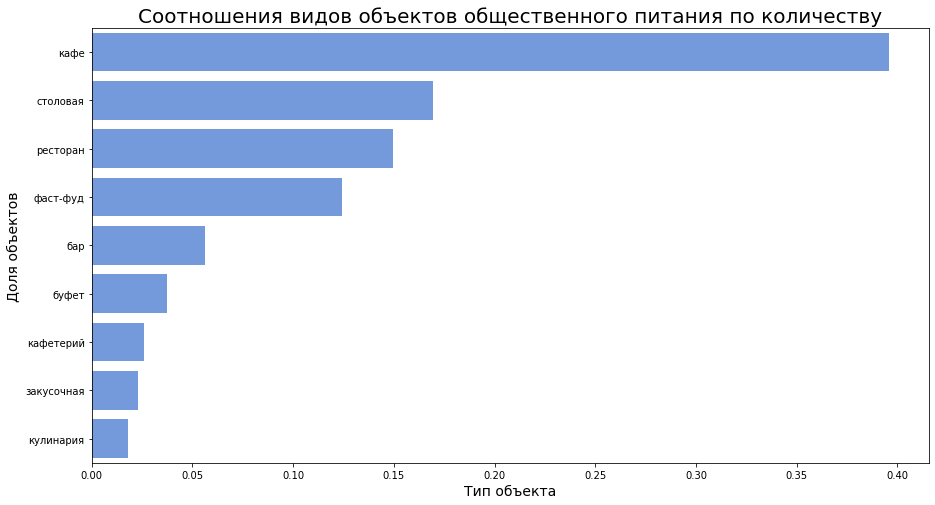

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x='count', y=rest_group_type.index, data=rest_group_type, color='cornflowerblue')
plt.xlabel("Тип объекта", size=14)
plt.ylabel("Доля объектов", size=14)
plt.title("Соотношения видов объектов общественного питания по количеству", size=20)
plt.show()

Около 40% от общего количетсва занимают кафе.

### Исследование соотношения сетевых и несетевых заведений по количеству.

Определим какую долю занимают сетевые и несетевые заведения и поcтроим столбчатую диаграмму этого распределения.

In [31]:
rest_group_chain = rest_data.groupby('chain').agg({'id': 'count'}) / rest_data['id'].count()

In [32]:
rest_group_chain = rest_group_chain.rename(columns={'id': 'count'}).sort_values(by='count')

In [33]:
rest_group_chain 

,count
chain,
сетевое,0.194177
несетевое,0.805823


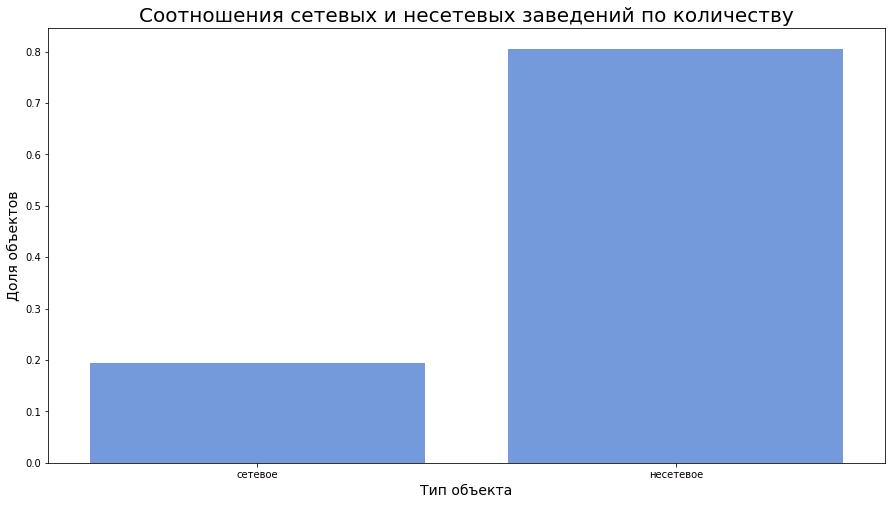

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x=rest_group_chain.index, y='count', data=rest_group_chain, color='cornflowerblue')
plt.xlabel("Тип объекта", size=14)
plt.ylabel("Доля объектов", size=14)
plt.title("Соотношения сетевых и несетевых заведений по количеству", size=20)
plt.show()

Преобладают несетевые заведения, на их долю приходится более 80%.

### Для какого вида объекта общественного питания характерно сетевое распространение?

Построим сводную таблицу количества сетевых/несетевых заведений  по типу объектов.

In [35]:
report = rest_data.pivot_table(index='object_type',columns='chain',values='id', aggfunc='count')

In [36]:
report

chain,несетевое,сетевое
object_type,,
бар,816,37
буфет,559,11
закусочная,291,56
кафе,4621,1387
кафетерий,342,51
кулинария,194,78
ресторан,1733,541
столовая,2572,3
фаст-фуд,1106,784


Найдём суммарное количество заведений и определим долю сетевых. После этого построим столбчатую диаграмму доли сетевых заведений по типу объекта.

In [37]:
report['суммарное кол-во'] = report['несетевое'] + report['сетевое']

In [38]:
report['%_сетевых'] = report['сетевое'] / report['суммарное кол-во']

In [39]:
report = report.sort_values(by='%_сетевых', ascending=False)

In [40]:
report

chain,несетевое,сетевое,суммарное кол-во,%_сетевых
object_type,,,,
фаст-фуд,1106,784,1890,0.414815
кулинария,194,78,272,0.286765
ресторан,1733,541,2274,0.237907
кафе,4621,1387,6008,0.230859
закусочная,291,56,347,0.161383
кафетерий,342,51,393,0.129771
бар,816,37,853,0.043376
буфет,559,11,570,0.019298
столовая,2572,3,2575,0.001165


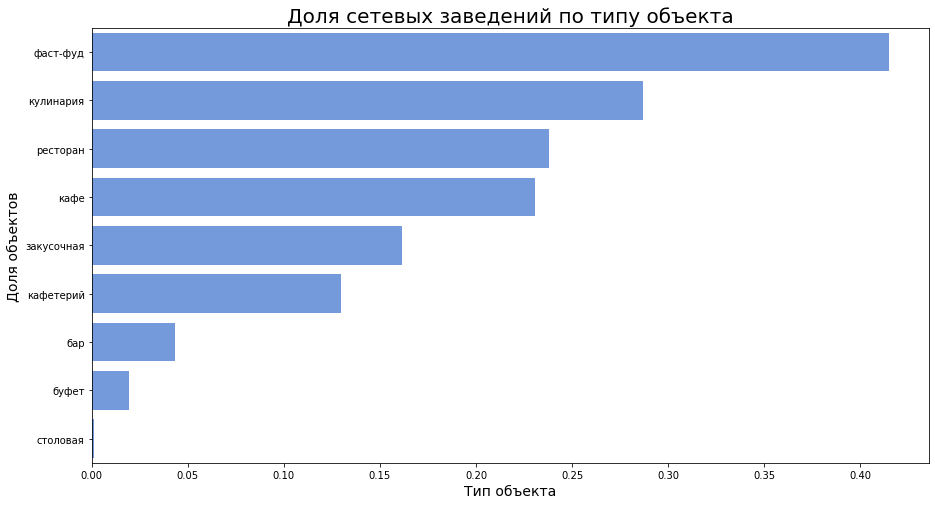

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(x='%_сетевых', y=report.index, data=report, color='cornflowerblue')
plt.xlabel("Тип объекта", size=14)
plt.ylabel("Доля объектов", size=14)
plt.title("Доля сетевых заведений по типу объекта", size=20)
plt.show()

Наиболее характерное сетевое распространение для фаст-фуда, более 40%.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Отфильтруем все сетевые заведения.

In [42]:
chain_rest = rest_data.query('chain =="сетевое"')

Для каждой сети посчитаем число заведений и среднее число посадочных мест.

In [43]:
fast_food_rest = chain_rest.query('object_type == "фаст-фуд"')

In [44]:
fast_food_rest.describe()

,id,number
count,784.000000,784.00000
mean,126876.488520,40.31250
std,63817.770017,50.79177
min,19675.000000,0.00000
25%,79908.750000,8.00000
50%,142842.000000,25.00000
75%,178200.250000,52.00000
max,223228.000000,580.00000


In [45]:
limit_to_number = int(fast_food_rest['number'].mean())
limit_to_number

40

In [46]:
limit_to_rest = math.floor(fast_food_rest.groupby('object_name_new')['id'].count().mean())
limit_to_rest 

10

Зададим границу по количеству заведений в сети 10 объектов, а по количеству посадочных мест в 40 мест.  
Добавим новый столбец, с категорией количества заведений в сгруппированный датафрейм.

In [47]:
chain_rest_grouped= chain_rest.groupby('object_name_new').agg({'id': 'count', 'number': 'mean'})

In [48]:
chain_rest_grouped['num_rest'] = 'Мало объектов'

In [49]:
chain_rest_grouped.loc[chain_rest_grouped['id'] > limit_to_rest, 'num_rest'] = 'Много объектов'

И добавим новый столбец, с категорией количества посадочных мест. И построим диаграмму рассеяния в зависимости от количества заведений и количества мест.

In [50]:
chain_rest_grouped['num_seats'] = 'Мало мест'

In [51]:
chain_rest_grouped.loc[chain_rest_grouped['number'] > limit_to_number, 'num_seats'] = 'Много мест'

In [52]:
chain_rest_grouped['category'] = chain_rest_grouped['num_seats'] + ' - ' + chain_rest_grouped['num_rest']

In [53]:
chain_rest_grouped.head()

,id,number,num_rest,num_seats,category
object_name_new,,,,,
bb&burgers,1,35.000000,Мало объектов,Мало мест,Мало мест - Мало объектов
beverly hills diner,1,88.000000,Мало объектов,Много мест,Много мест - Мало объектов
bierloga,1,75.000000,Мало объектов,Много мест,Много мест - Мало объектов
black & white,1,40.000000,Мало объектов,Мало мест,Мало мест - Мало объектов
bocconcino,3,66.666667,Мало объектов,Много мест,Много мест - Мало объектов


Text(0.5, 1.0, 'Диаграмма рассеяния в зависимости от количества заведений и количества мест в сетевых заведениях')

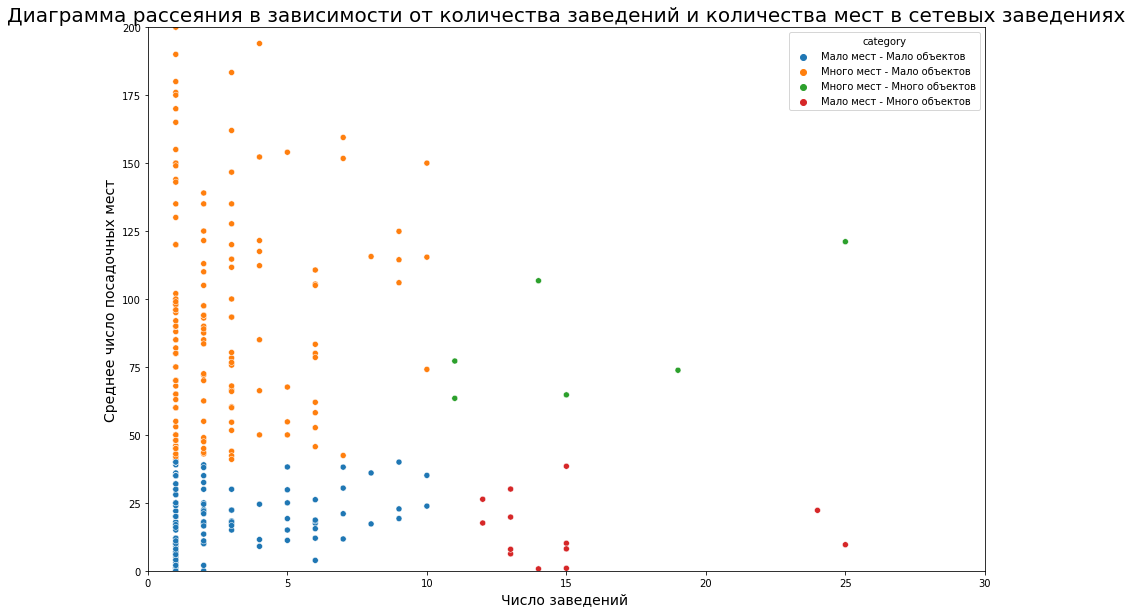

In [54]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=chain_rest_grouped, x='id', y='number', hue='category')
plt.xlim(0,30)
plt.ylim(0,200)
plt.ylabel("Cреднее число посадочных мест", size=14)
plt.xlabel("Число заведений ", size=14)
plt.title("Диаграмма рассеяния в зависимости от количества заведений и количества мест в сетевых заведениях", size=20)

Из диаграммы рассеяния видно, что для сетевых заведений, характерно много посадочных мест и мало заведений.

### Определение среднего количества посадочных мест для каждого вида объекта общественного питания  Какой вид предоставляет в среднем самое большое количество посадочных мест?

Сгруппируем тип заведения по медианному количеству посадочных мест, отсортируем по убыванию количества мест и построим столбчатую диаграмму. 

In [55]:
rest_median_number = rest_data.groupby('object_type').agg({'number': 'median'})

In [56]:
rest_median_number = rest_median_number.rename(columns={'number': 'median'}).sort_values(by='median', ascending=False)

In [57]:
rest_median_number

,median
object_type,
столовая,103
ресторан,80
бар,35
буфет,32
кафе,32
кафетерий,6
фаст-фуд,6
закусочная,0
кулинария,0


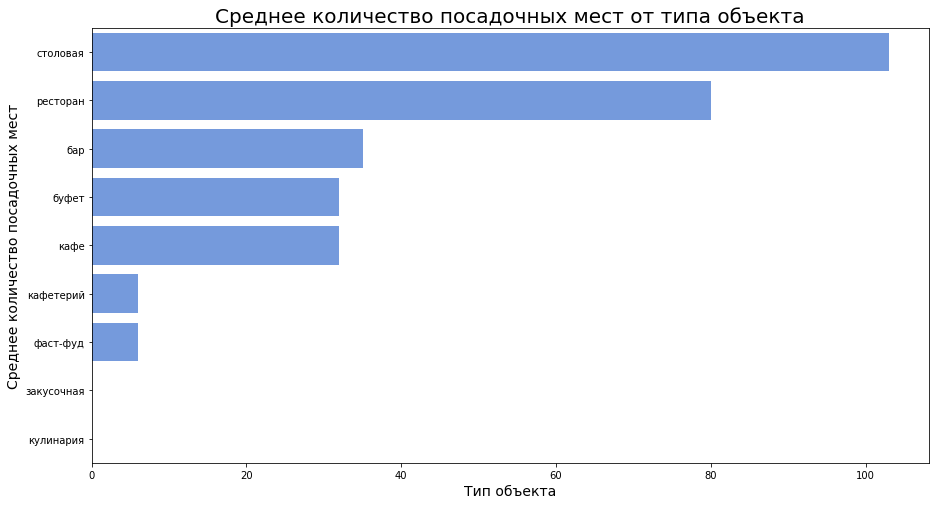

In [58]:
plt.figure(figsize=(15,8))
sns.barplot(data=rest_median_number, x='median', y=rest_median_number.index, color='cornflowerblue' )
plt.xlabel("Тип объекта", size=14)
plt.ylabel("Cреднее количество посадочных мест", size=14)
plt.title("Cреднее количество посадочных мест от типа объекта", size=20)
plt.show()

Наибольшее среднее количество посадочных мест, ожидаемо, у столовых.

### Выделите в отдельный столбец информацию об улице из столбца address

Создадим функцию для выделения информации об улице нахождения заведения.

In [59]:
def get_streetname(cell):
    # разбиваем адрес на части и для каждой части проверяем есть ли в ней тип улицы
    for addr_part in cell.split(','):
        for s_type in ['улица', 'бульвар',]:
            if s_type in addr_part: return addr_part
    # если ничего не нашли - возвращаем второй элемент
    return cell.split(',')[1]

rest_data['streetname'] = rest_data['address'].apply(get_streetname).str.strip()

In [60]:
rest_data

,id,object_name,chain,object_type,address,number,object_name_new,streetname
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,улица Егора Абакумова
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,улица Талалихина
2,24309,кафе «академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе «академия»,Абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,Абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе «вишневая метель»,Абрамцевская улица
...,...,...,...,...,...,...,...,...
15359,222077,кофейня «шоколадница»,сетевое,кафе,"город Москва, Кантемировская улица, дом 47",72,шоколадница,Кантемировская улица
15360,219759,шоколадница,сетевое,кафе,"город Москва, улица Вавилова, дом 3",36,шоколадница,улица Вавилова
15361,208537,шоколадница,сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,шоколадница,3-й Крутицкий переулок
15362,209264,шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10,шоколадница,улица Земляной Вал


### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Определим топ-10 улиц по количеству объектов общественного питания и постоим график.

In [61]:
top_10_street = rest_data.groupby('streetname').agg({'id': 'count'}).sort_values(by='id', ascending=False).head(10)

In [62]:
top_10_street = top_10_street.rename(columns={'id': 'count'}).reset_index()

In [63]:
top_10_street

,streetname,count
0,город Зеленоград,211
1,проспект Мира,196
2,Профсоюзная улица,181
3,Ленинградский проспект,170
4,Пресненская набережная,165
5,Варшавское шоссе,159
6,Ленинский проспект,147
7,проспект Вернадского,126
8,Кутузовский проспект,114
9,Каширское шоссе,110


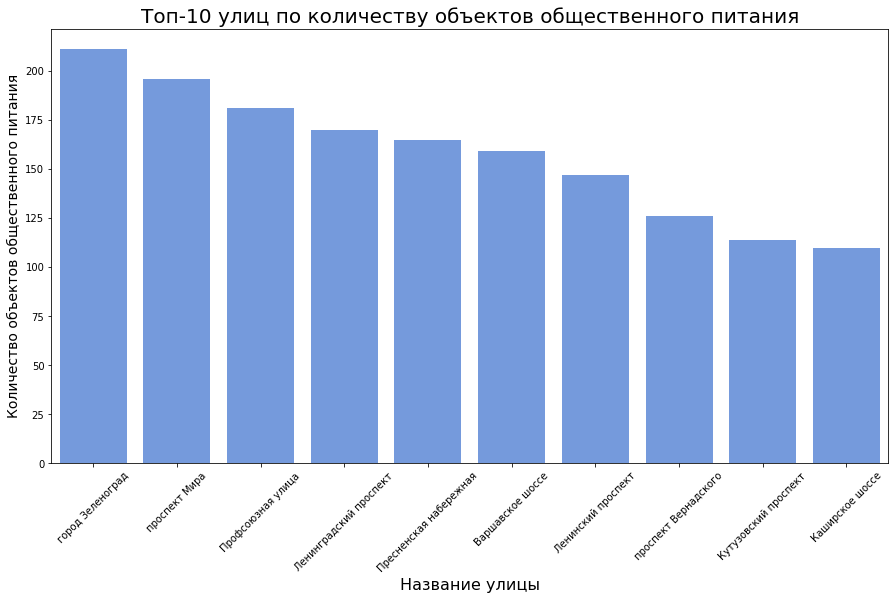

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_10_street, x='streetname', y='count', color='cornflowerblue')
plt.xlabel("Название улицы", size=16)
plt.xticks(rotation=45)
plt.ylabel("Количество объектов общественного питания", size=14)
plt.title("Топ-10 улиц по количеству объектов общественного питания", size=20)
plt.show()

На первом месте по количеству объектов общественного питания город Зеленоград, который географически не входит в состав Москвы .Так что, первое место по количеству объектов общественного питания, можно засчитать проспекту Мира.  
Для определения районов Москвы, где находятся улицы из топ-10, воспользуемся справочником улиц Мосгаза.

In [65]:
from io import BytesIO
import requests
spreadsheet_id = '1VguPzdGjZb3EfOyM0d1j7Y-wfA9rszPa5gALn_OcuQc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
street_df = pd.read_csv(BytesIO(r.content))
street_df.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Объединим датафрейм top_10_street со справочником улиц.

In [66]:
rest_data_merged = top_10_street.merge(street_df, on='streetname')

In [67]:
rest_data_merged

,streetname,count,areaid,okrug,area
0,город Зеленоград,211,51,Зеленоград,Район Крюково
1,город Зеленоград,211,52,Зеленоград,Район Матушкино-Савелки
2,город Зеленоград,211,53,Зеленоград,Панфиловский район
3,проспект Мира,196,70,СВАО,Алексеевский район
4,проспект Мира,196,86,СВАО,Ярославский Район
5,проспект Мира,196,78,СВАО,Район Марьина роща
6,проспект Мира,196,79,СВАО,Останкинский район
7,проспект Мира,196,81,СВАО,Район Ростокино
8,проспект Мира,196,82,СВАО,Район Свиблово
9,проспект Мира,196,16,ЦАО,Мещанский район


Найдем количество районов и округов, через которые проходят данные улицы.

In [68]:
pivot_street = pd.pivot_table(rest_data_merged, index='streetname', values=['area', 'okrug'],
               aggfunc={'area':'nunique', 'okrug': 'nunique'}).sort_values(['area', 'okrug'], ascending=False)
pivot_street

,area,okrug
streetname,,
Ленинский проспект,8,4
Варшавское шоссе,8,2
проспект Мира,7,2
Профсоюзная улица,6,1
проспект Вернадского,5,2
Каширское шоссе,4,1
Ленинградский проспект,4,1
город Зеленоград,3,1
Кутузовский проспект,2,1


Ленинский проспект проходит через 8 районов в 4 округах.

In [69]:
merged_street = top_10_street.merge(pivot_street, on='streetname')
merged_street 

,streetname,count,area,okrug
0,город Зеленоград,211,3,1
1,проспект Мира,196,7,2
2,Профсоюзная улица,181,6,1
3,Ленинградский проспект,170,4,1
4,Пресненская набережная,165,1,1
5,Варшавское шоссе,159,8,2
6,Ленинский проспект,147,8,4
7,проспект Вернадского,126,5,2
8,Кутузовский проспект,114,2,1
9,Каширское шоссе,110,4,1


Если мы принимаем протяженность улиц как количество районов через которые проходит улица, то лидер по количеству заведений - проспект Мира, также входит в топ-3 по протяженности. В общем, улицы с высоким количеством заведений общепита, проходят через большое количество районов (от 4 и больше), т.е. довольно протяженные. Кроме Пресненской набережной и Кутузовского проспекта.

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [70]:
street_count_rest = rest_data.groupby('streetname').agg({'id': 'count'})

In [71]:
len(street_count_rest.query('id == 1'))

582

Число улиц с одним объектом общественного питания равно 582 шт.

In [72]:
street_with_one_rest = street_count_rest.query('id == 1')

In [73]:
street_with_one_rest

,id
streetname,
1-й Балтийский переулок,1
1-й Басманный переулок,1
1-й Ботанический проезд,1
1-й Вешняковский проезд,1
1-й Голутвинский переулок,1
...,...
улица Шумилова,1
улица Шумкина,1
улица Щорса,1


Для определения районов Москвы, где находятся улицы с одним объектом общественного питания, также воспользуемся справочником улиц Мосгаза. 

In [74]:
area_with_one_rest = street_with_one_rest.merge(street_df, on='streetname')

In [75]:
area_with_one_rest

,streetname,id,areaid,okrug,area
0,1-й Балтийский переулок,1,54,САО,Район Аэропорт
1,1-й Басманный переулок,1,13,ЦАО,Басманный район
2,1-й Басманный переулок,1,15,ЦАО,Красносельский район
3,1-й Ботанический проезд,1,82,СВАО,Район Свиблово
4,1-й Вешняковский проезд,1,120,ЮВАО,Рязанский район
...,...,...,...,...,...
559,улица Шеногина,1,92,СЗАО,Район Хорошево-Мневники
560,улица Шумилова,1,113,ЮВАО,Район Кузьминки
561,улица Шумкина,1,26,ВАО,Район Сокольники
562,улица Щорса,1,46,ЗАО,Район Солнцево


In [76]:
count_area_with_one_rest = area_with_one_rest.groupby(['area', 'okrug']).agg({'id': 'count'}).sort_values(by='id', ascending=False).head(10).reset_index()

In [77]:
count_area_with_one_rest

,area,okrug,id
0,Таганский район,ЦАО,27
1,Район Хамовники,ЦАО,26
2,Басманный район,ЦАО,25
3,Тверской район,ЦАО,20
4,Пресненский район,ЦАО,19
5,Район Марьина роща,СВАО,18
6,Район Арбат,ЦАО,17
7,Мещанский район,ЦАО,16
8,Район Сокольники,ВАО,15
9,Район Замоскворечье,ЦАО,14


Топ 10 районов с одним заведением общественного питания находятся в центральном округе Москвы или в районах, примыкающих к нему.
В Центральном административном округе Москвы много небольших улиц, что может объяснить лидерство районов из этого округа. 

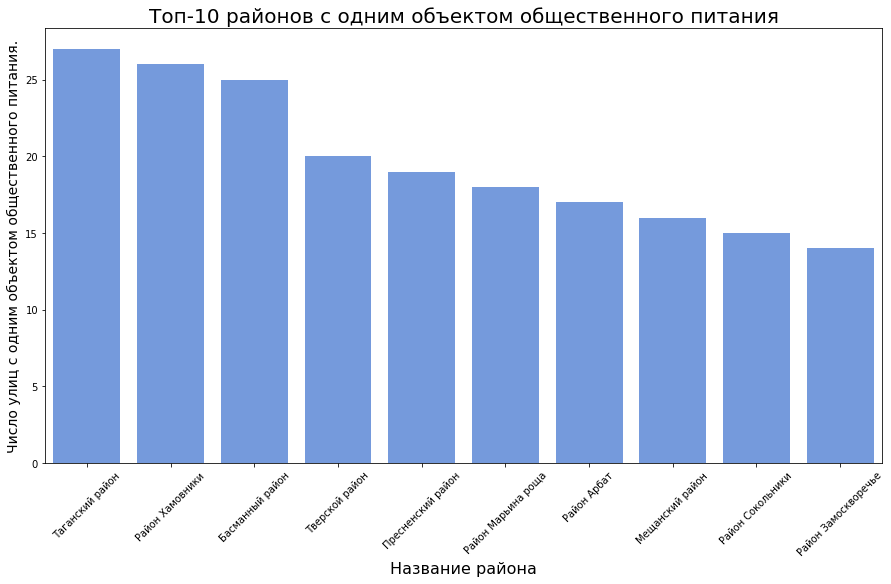

In [78]:
plt.figure(figsize=(15,8))
sns.barplot(data=count_area_with_one_rest, x='area', y='id', color='cornflowerblue')
plt.xlabel("Название района", size=16)
plt.xticks(rotation=45)
plt.ylabel("Число улиц с одним объектом общественного питания.", size=14)
plt.title("Топ-10 районов с одним объектом общественного питания", size=20)
plt.show()

## Общий вывод, рекомендации о виде заведения, количестве посадочных мест, а также районе расположения.

В ходе работы были подготовлены и проанализированы данные о заведениях общественного питания города Москвы. 

Анализ данных состоял из следующих этапов:  

- Исследование соотношения видов объектов общественного питания по количеству  
Наибольшее (около 40%) от общего количества объектов приходится на кафе. 


- Исследование соотношения сетевых и несетевых заведений по количеству  
Преобладают (более 80%) несетевые заведения.  


- Определение вида объекта общественного питания характерного для сетевого распространения  
Наиболее характерное сетевое распространение для фаст-фуда, более 40%.


- Определение характерного для сетевых заведений распределения количества посадочных мест и количества заведений  
Для сетевых заведений, характерно много посадочных мест и мало заведений.


- Определение среднего количества посадочных мест для каждого вида объекта общественного питания и определение вида объекта с наибольшиме количеством посадочных мест  
Наибольшее среднее количество посадочных мест, у столовых (примерно 130 мест)


- Определение топ-10 улиц по количеству объектов общественного питания и определения районов нахождения этих улиц.   
город Зеленоград, проспект Мира, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе. 


- Определение числа улиц с одним объектом общественного питания и нахождение районов Москвы, где находятся эти улицы.   
Наибольшее число таких улиц находятся в районах: Таганский, Хамовники и Басманный.


Рекомендации:
- Вид заведения - следует выбрать кафе, самый популярный вид заведений.
- Количество посадочных мест - около 40, характерное количество мест для кафе.
- Район расположения - один из топ-3 районов с максимальным количеством улиц с одним объектом питания, т.е. Таганский, Хамовники или Басманный. Если на улице только одно заведение, ему будет легче навязать конкуренцию, за счёт оригинальности роботов-официантов. При большом количестве заведений на улице, эта оринальность может быть не всегда замечена.